# Intro to Deep Learning: Neural Networks for Digit Classification, Using Keras
---
Today, we'll be using Keras to **train a neural network to classify handwritten digits**. To do this, we'll be taking advantage of the pre-labeled [**MNIST dataset**](https://en.wikipedia.org/wiki/MNIST_database), which contains 70,000 grayscale images of handwritten digits, along with their corresponding digit labels.

Since we want our model to be able to perform well in the real world on **previously unseen data**, we'll only train it on 60,000 images, and then evaluate our model on the remaining 10,000.

### Introductory Guides:
* Workshop presentation slides: [here](https://docs.google.com/presentation/d/1RHnHtlQt9nWoIsmiDPNZ4aoWPIzRt1X3OFm304OfmbQ/edit?usp=sharing)
* Getting started with Keras: https://keras.io/
* Keras Sequential model introductory guide: https://keras.io/getting-started/sequential-model-guide/
* Keras Sequential model documentation: https://keras.io/models/sequential/
* Keras core layers: https://keras.io/layers/core/

### Topic-Specific Resources/Documentation:
* Numpy arrays: https://docs.scipy.org/doc/numpy-1.13.0/reference/arrays.ndarray.html
* Activation Functions - ML Cheatsheet: http://ml-cheatsheet.readthedocs.io/en/latest/activation_functions.html
* Activation Functions - Keras Documentation: https://keras.io/activations/
* Cost/Loss Functions - ML Cheatsheet: http://ml-cheatsheet.readthedocs.io/en/latest/loss_functions.html
* Cost/Loss Functions - Keras Documentation: https://keras.io/losses
* Keras Optimizers (e.g. Gradient Descent): https://keras.io/optimizers

## Loading in MNIST

In [74]:
# Import MNIST dataset from Keras

from keras.datasets import mnist
(train_x, train_y), (test_x, test_y) = mnist.load_data()

In [75]:
# Data exploration

print("Inputs shape is " + str(train_x.shape)) # 60,000 samples, each image: 28 x 28 pixels
print("Input type is " + str(type(train_x)))
print("Labels:")
print(train_y)
print("Labels shape is " + str(train_y.shape))
print("Labels type is " + str(type(train_y)))

Inputs shape is (60000, 28, 28)
Input type is <class 'numpy.ndarray'>
Labels:
[5 0 4 ..., 5 6 8]
Labels shape is(60000,)
Labels type is <class 'numpy.ndarray'>


In [77]:
# Matplotlib: Data visualization library
import matplotlib.pyplot as plt

5


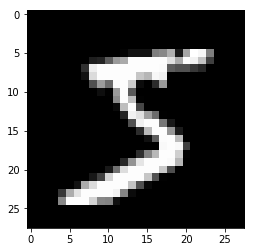

In [78]:
# Visualize the input samples

sample_num = 0 # change this number and re-run the cell to see different image samples!

plt.imshow(train_x[sample_num], cmap=plt.get_cmap('gray'))
print(train_y[sample_num])
plt.show()

## Pre-Processing the Data: 
* **Flatten** the 28 x 28 2D images into 784-dimensional column vectors. Each pixel will then correspond to one neuron in the 784-dimensional input layer of our neural network.
* **Normalize** the pixel values from 0-255 to 0-1. We can do this by simply dividing each of the 0-255 greyscale values by 255. Neural networks typically like to work with smaller values, so this normalization is a pretty common first step in most deep learning tasks.
* **Categorize** the outputs into 10-dimensional "one-hot" vectors. The MNIST dataset originally contains actual numerical labels for each image (e.g. 1, 2, ...), but remember that our neural network outputs 10 distinct values (one for each digit) -- not just the digit number itself. We want our training labels to match up with our neural network output. These categorized vectors contain all 0's, except a 1 in the location indicating which digit the image corresponds to.

In [91]:
# Flatten 28*28 images to a 784 vector for each image

num_pixels = train_x.shape[1] * train_x.shape[2] # 28 * 28 = 784
train_x_flattened = train_x.reshape(train_x.shape[0], num_pixels).astype('float32') # new shape: 60,000 x 784
test_x_flattened = test_x.reshape(test_x.shape[0], num_pixels).astype('float32') # new shape: 10,000 x 784

In [92]:
# Normalize pixel values to between 0-1
train_x_flattened = train_x_flattened / 255.
test_x_flattened = test_x_flattened / 255.

In [83]:
import keras

# Use Keras to categorize the outputs ("one-hot" vectors)
train_y_categorical = keras.utils.to_categorical(train_y, num_classes=10)
test_y_categorical = keras.utils.to_categorical(test_y, num_classes=10)

# let's see result of categorizing the outputs
print(train_y_categorical[:5]) # print out first 5 training label vectors

[[ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]]


## Creating our Neural Network Model
1. **Initialize** the network, add desired layers. The settings we decide to use, e.g. number of layers, number of neurons per layer, are called **hyperparameters**, and have to be tuned by hand, rather than learned via gradient descent.
2. **Compile** the network to get ready for training. This tells the network what cost/loss function to use ("cost" and "loss" are used interchangeably), and what type of gradient descent to use.
3. **Fit** the network to the training images. This actually feeds the training data into the network, and uses gradient descent and backpropagation to adjust the network's weights in order to minimize the cost function.

In [84]:
from keras.layers import Dense, Activation
from keras.models import Sequential

# Initialize simple neural network model
model = Sequential()

# TODO: add layers to the model

# Hidden layer 1: 500 neurons, 'sigmoid' activation (to keep values between 0-1)
    # See: 'Dense' in https://keras.io/layers/core/, https://keras.io/getting-started/sequential-model-guide/
    # Make sure to specify the input shape!
    # This layer should hopefully learn to detect edges, corners, etc.

# Hidden layer 2: 250 neurons, 'sigmoid' activation
    # This layer should hopefully learn to detect higher-level shapes

# Output layer: 10 neurons (one for each class), 'sigmoid' activation
    # This layer represents the scores that the network assigns to each possible digit, 1-10


In [85]:
# Compile the model, get ready to train

# TODO: compile the model
    # Loss: Mean-Squared Error
        # See: https://en.wikipedia.org/wiki/Mean_squared_error
    # Optimizer: stochastic gradient descent (SGD), AKA "drunk walk" gradient descent
    # Additional metrics: Accuracy
    
    # See: https://keras.io/losses/, https://keras.io/optimizers/, \
        # 'Compilation' in https://keras.io/getting-started/sequential-model-guide/
    

In [102]:
# Print model summary
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 500)               392500    
_________________________________________________________________
activation_10 (Activation)   (None, 500)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 250)               125250    
_________________________________________________________________
activation_11 (Activation)   (None, 250)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 10)                2510      
_________________________________________________________________
activation_12 (Activation)   (None, 10)                0         
Total params: 520,260
Trainable params: 520,260
Non-trainable params: 0
_________________________________________________________________


In [99]:
# Fit the model to the training data

# TODO: train the model
    # Number of epochs: 10 (i.e. how many times to loop over the training data/how long we should train our network)
    # Batch size: 16 (how big our "drunk walk" samples should be)
    # See: 'fit()' in https://keras.io/models/sequential/
    # Pass in the FLATTENED train_x as input, and the CATEGORICAL train_y as the labels
    

## Evaluating our Neural Network

In [101]:
# Evaluate trained model on test data

# Returns final test loss & test accuracy
    # See: 'evaluate' in https://keras.io/models/sequential/
loss_and_metrics = model.evaluate(test_x_flattened, test_y_categorical, batch_size=128)
final_cost = loss_and_metrics[0]
final_accuracy = loss_and_metrics[1]

print()
print("Final test cost: ", final_cost)
print("Final test accuracy: ", final_accuracy)

 9984/10000 [============================>.] - ETA: 0s[0.076234949612244959, 0.97650000000000003]


**Final Sanity Check:** Make sure the our neural network's predictions match up with the actual images

[[  5.93499635e-07   3.60586654e-07   3.33752214e-05   1.70179948e-04
    4.71735984e-09   1.18259372e-07   3.75181067e-11   9.99784052e-01
    1.75005619e-06   9.52563641e-06]]
7


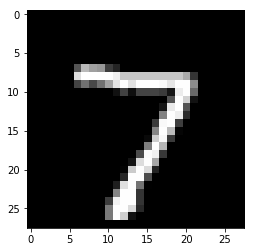

In [94]:
import numpy as np

sample_num = 0 # which test sample to look at. TODO: Play around with this number to see how \
    # our neural network performs on different test images

# Predicted class
test_sample = np.expand_dims(test_x_flattened[sample_num], axis=0) # pick out a one-sample "batch" to feed into model
predicted_scores = model.predict(test_sample) # outputted probabilities vector
print("Output vector: ", predicted_scores[0]) # print predicted scores

predicted_class = np.argmax(predicted_scores) # pick the class with highest probability --> final prediction
print("Predicted digit: ", predicted_class) # print predicted classification

# Show actual input image
plt.imshow(test_x[sample_num], cmap=plt.get_cmap('gray'))
plt.show()

## Congrats! You just did deep learning!
If you have extra time, feel free to play around with the hyperparameters (number of neurons per layer, number of epochs, batch size, etc.) to see if you can improve the network's final accuracy. Try to get at least 90%.

## Next Steps:
* Convolutional Neural Networks (CNNs): [Introductory YouTube video](https://www.youtube.com/watch?v=FmpDIaiMIeA)
* Keras MNIST CNN [example](https://github.com/keras-team/keras/blob/master/examples/mnist_cnn.py)
* Micheal Nielson: [Neural Networks and Deep Learning](http://neuralnetworksanddeeplearning.com/)
* CAIS++ Deep Learning [Curriculum](http://caisplusplus.usc.edu/curriculum.html)
* Stanford's [CS 231n](http://cs231n.stanford.edu/): Convolutional Neural Networks for Visual Recognition